In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression  
from sklearn.neighbors import KNeighborsClassifier   
from sklearn.tree import DecisionTreeClassifier  
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [2]:
df = pd.read_excel('dataset.xlsx')
df

,Song name,Artist,Album,genre,Producer,arist has grammy,song has grammy,duration,Billboard peak,Like/not like
0,Shape of you,Ed Sheeran,Divide,Pop,Steve Mac,1,1,03:53:00,1,0
1,Counting Stars,One Republic,Native,Pop,Ryan Tedder,0,0,04:16:00,2,1
2,Cruel Summer,Taylor Swift,Lover,Pop,Jack Antonoff,1,0,02:58:00,3,1
3,One Way Or Another,One Direction,One Way Or Another,Pop,John Ryan,0,0,02:37:00,24,1
4,Style,Taylor Swift,1989,Synth-Pop,Max Martin,1,0,03:50:00,6,1
5,Traitor,Olivia Rodrigo,Sour,Indie Pop,Dan Nigro,1,0,03:49:00,7,1
6,Blinding Lights,The Weekend,After Hours,Synth-Pop,Max Martin,1,0,03:22:00,1,1
7,Cate's Brother,Maisie Peters,NaN,Pop,Fat Max Gsus,0,0,02:59:00,0,0
8,Nonsence,Sabrina Carpenter,Emails I Cant Send,R&B,Julian Bunetta,0,0,02:43:00,36,0
9,Hide Away,Daya,"Sit Still, Look Pretty",Synth-Pop,Scott Bruzenak,0,0,03:12:00,84,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Song name         55 non-null     object
 1   Artist            55 non-null     object
 2   Album             51 non-null     object
 3   genre             55 non-null     object
 4   Producer          55 non-null     object
 5   arist has grammy  55 non-null     int64 
 6   song has grammy   55 non-null     int64 
 7   duration          55 non-null     object
 8   Billboard peak    55 non-null     int64 
 9   Like/not like     55 non-null     int64 
dtypes: int64(4), object(6)
memory usage: 4.4+ KB


In [4]:
# предварительная работа с данными
df ['duration'] = [str(i) for i in df['duration']]
df['duration'] = df['duration'].apply(lambda i: int(i[1]) * 60 + int(i[3:5]))
df

,Song name,Artist,Album,genre,Producer,arist has grammy,song has grammy,duration,Billboard peak,Like/not like
0,Shape of you,Ed Sheeran,Divide,Pop,Steve Mac,1,1,233,1,0
1,Counting Stars,One Republic,Native,Pop,Ryan Tedder,0,0,256,2,1
2,Cruel Summer,Taylor Swift,Lover,Pop,Jack Antonoff,1,0,178,3,1
3,One Way Or Another,One Direction,One Way Or Another,Pop,John Ryan,0,0,157,24,1
4,Style,Taylor Swift,1989,Synth-Pop,Max Martin,1,0,230,6,1
5,Traitor,Olivia Rodrigo,Sour,Indie Pop,Dan Nigro,1,0,229,7,1
6,Blinding Lights,The Weekend,After Hours,Synth-Pop,Max Martin,1,0,202,1,1
7,Cate's Brother,Maisie Peters,NaN,Pop,Fat Max Gsus,0,0,179,0,0
8,Nonsence,Sabrina Carpenter,Emails I Cant Send,R&B,Julian Bunetta,0,0,163,36,0
9,Hide Away,Daya,"Sit Still, Look Pretty",Synth-Pop,Scott Bruzenak,0,0,192,84,0


In [7]:
# Добавим параметр "количество слов в названии песни" 
df['Words in song name'] = df['Song name'].apply(lambda i: int(len(str(i).split())))
cols = list(df.columns)
cols = cols[0:9] + cols[10:] + [cols[9]]
df = df [cols]
print (df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Song name           55 non-null     object
 1   Artist              55 non-null     object
 2   Album               51 non-null     object
 3   genre               55 non-null     object
 4   Producer            55 non-null     object
 5   arist has grammy    55 non-null     int64 
 6   song has grammy     55 non-null     int64 
 7   duration            55 non-null     int64 
 8   Billboard peak      55 non-null     int64 
 9   Words in song name  55 non-null     int64 
 10  Like/not like       55 non-null     int64 
dtypes: int64(6), object(5)
memory usage: 4.9+ KB
None


In [8]:
print (df.describe()) # описательная статистика

       arist has grammy  song has grammy    duration  Billboard peak   \
count         55.000000        55.000000   55.000000        55.000000   
mean           0.327273         0.109091  202.763636        16.218182   
std            0.473542         0.368818   36.311902        27.036115   
min            0.000000         0.000000  131.000000         0.000000   
25%            0.000000         0.000000  178.500000         0.000000   
50%            0.000000         0.000000  202.000000         1.000000   
75%            1.000000         0.000000  228.500000        16.000000   
max            1.000000         2.000000  311.000000        89.000000   

       Words in song name  Like/not like  
count           55.000000      55.000000  
mean             2.181818       0.654545  
std              1.123666       0.479899  
min              1.000000       0.000000  
25%              1.000000       0.000000  
50%              2.000000       1.000000  
75%              3.000000       1.000000 

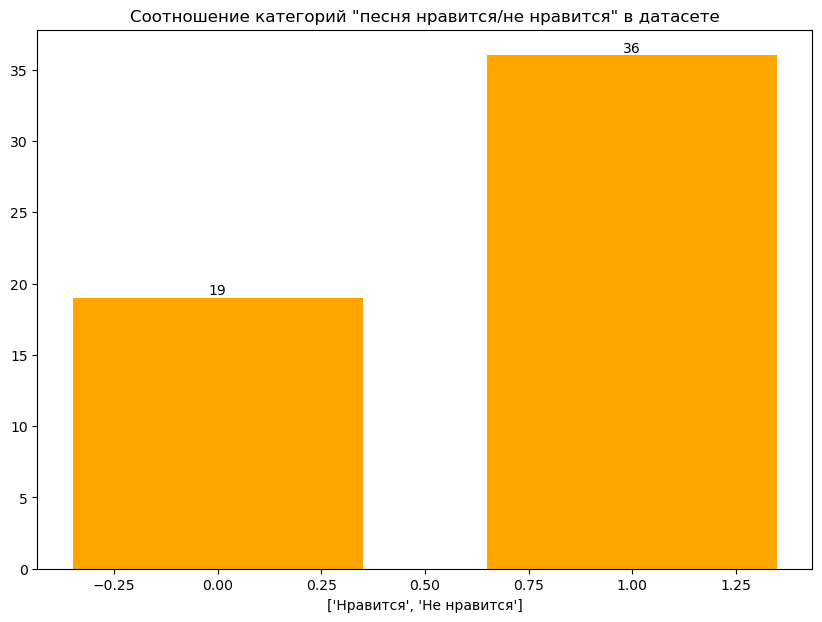

In [9]:
fig, ax = plt.subplots(figsize = (10,7))
x = [1, 0]
y = [len(df[df['Like/not like'] == 1]), len(df[df['Like/not like'] == 0])]
bar_container = ax.bar (x, y, color = 'orange', width = 0.7)
ax.set (title ='Соотношение категорий "песня нравится/не нравится" в датасете', xlabel = ['Нравится', 'Не нравится'])
plt.bar_label(bar_container)
plt.show()
plt.close('all')

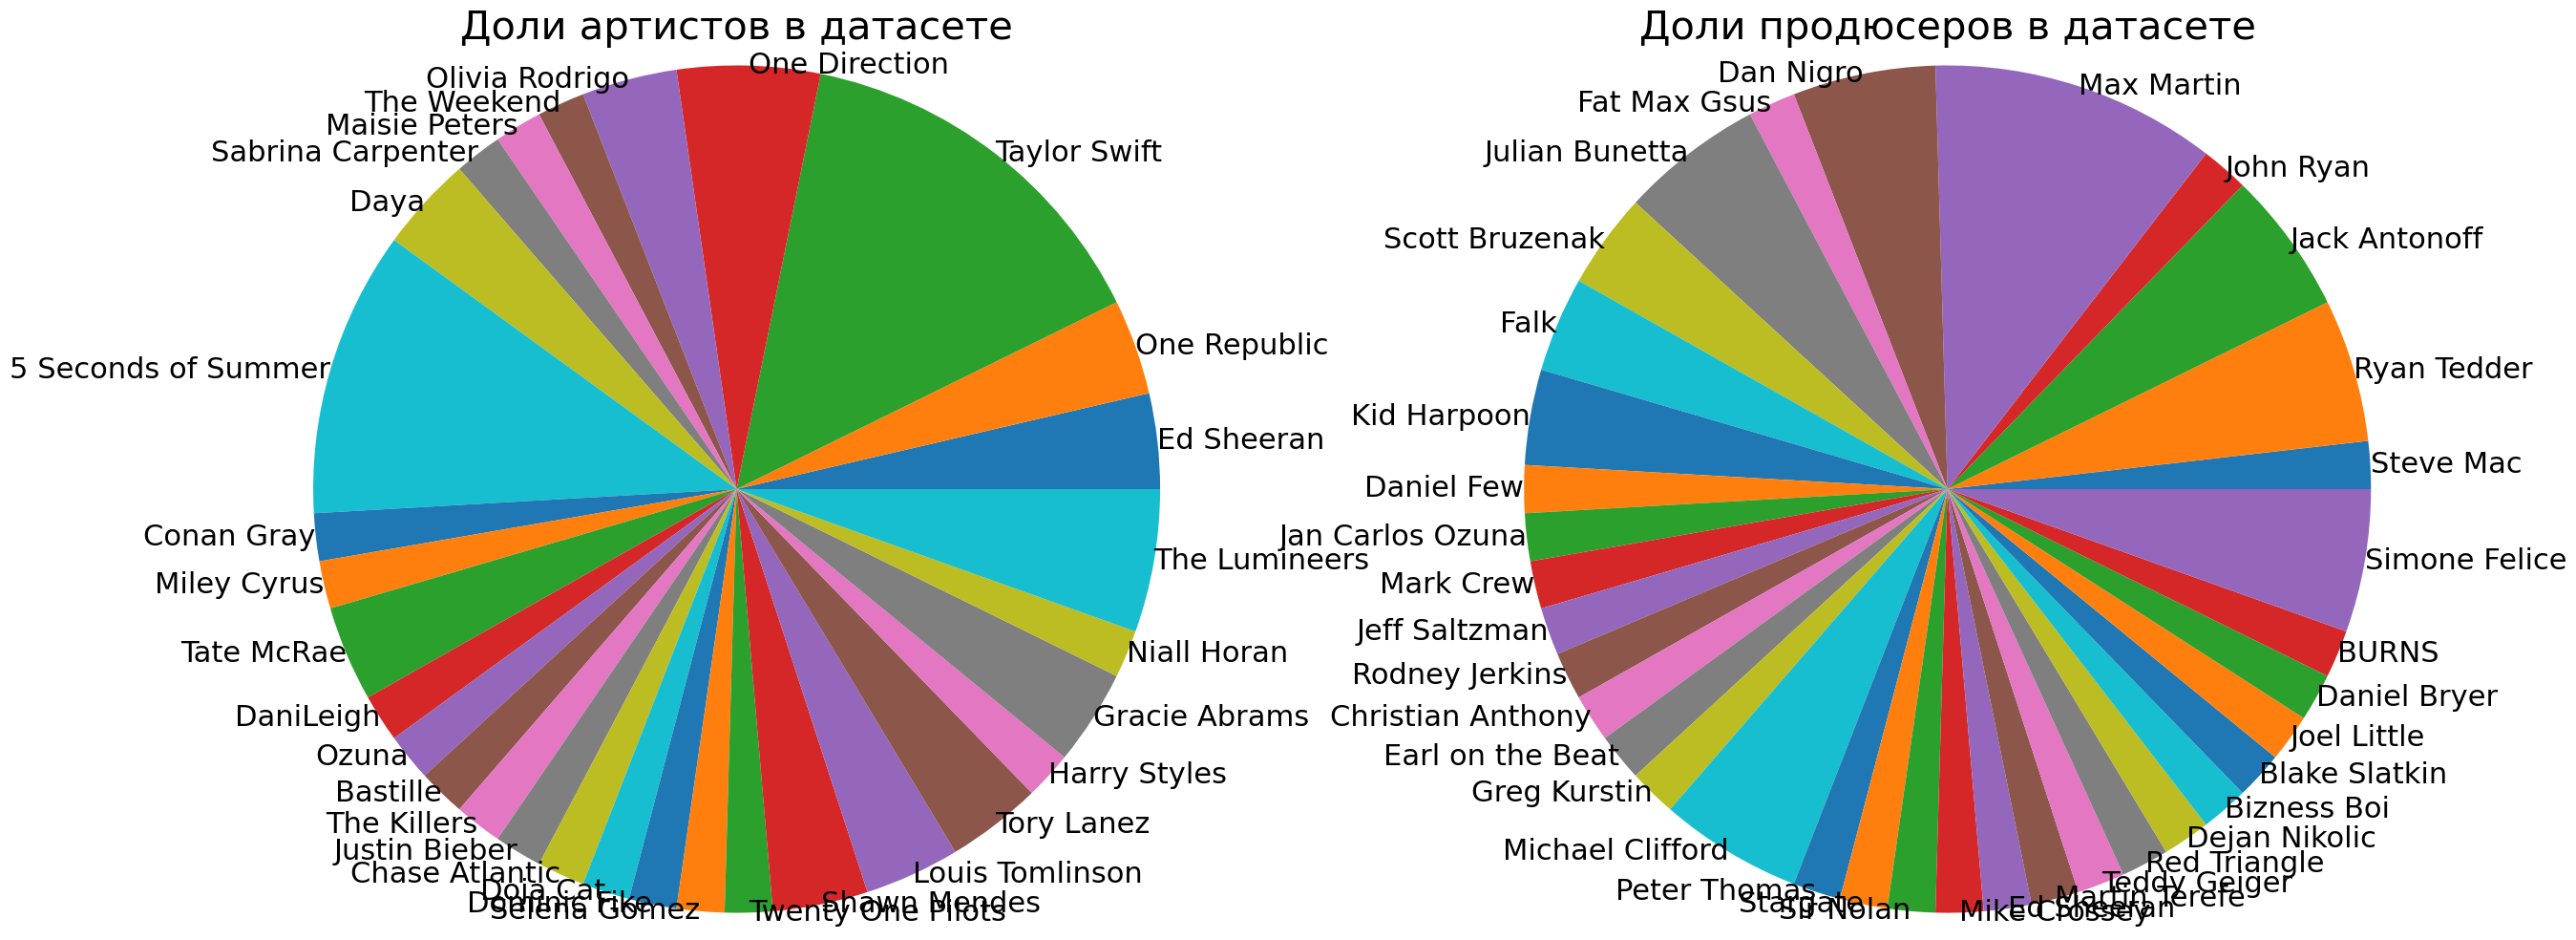

In [10]:
plt.figure(figsize = (30, 12))
plt.subplot(1, 2, 1)
pers = df['Artist'].value_counts(sort = False)
plt.title ('Доли артистов в датасете', fontdict = {'fontsize' : 30})
plt.pie(pers, labels = df['Artist'].unique(), labeldistance=1, radius=1.2, textprops={'fontsize': 22})
plt.subplot(1,2,2)
plt.title ('Доли продюсеров в датасете', fontdict = {'fontsize' : 30})
plt.pie(df['Producer'].value_counts(sort = False), labels = df['Producer'].unique(), labeldistance=1, radius=1.2, textprops={'fontsize': 22})
plt.show()
plt.close('all')

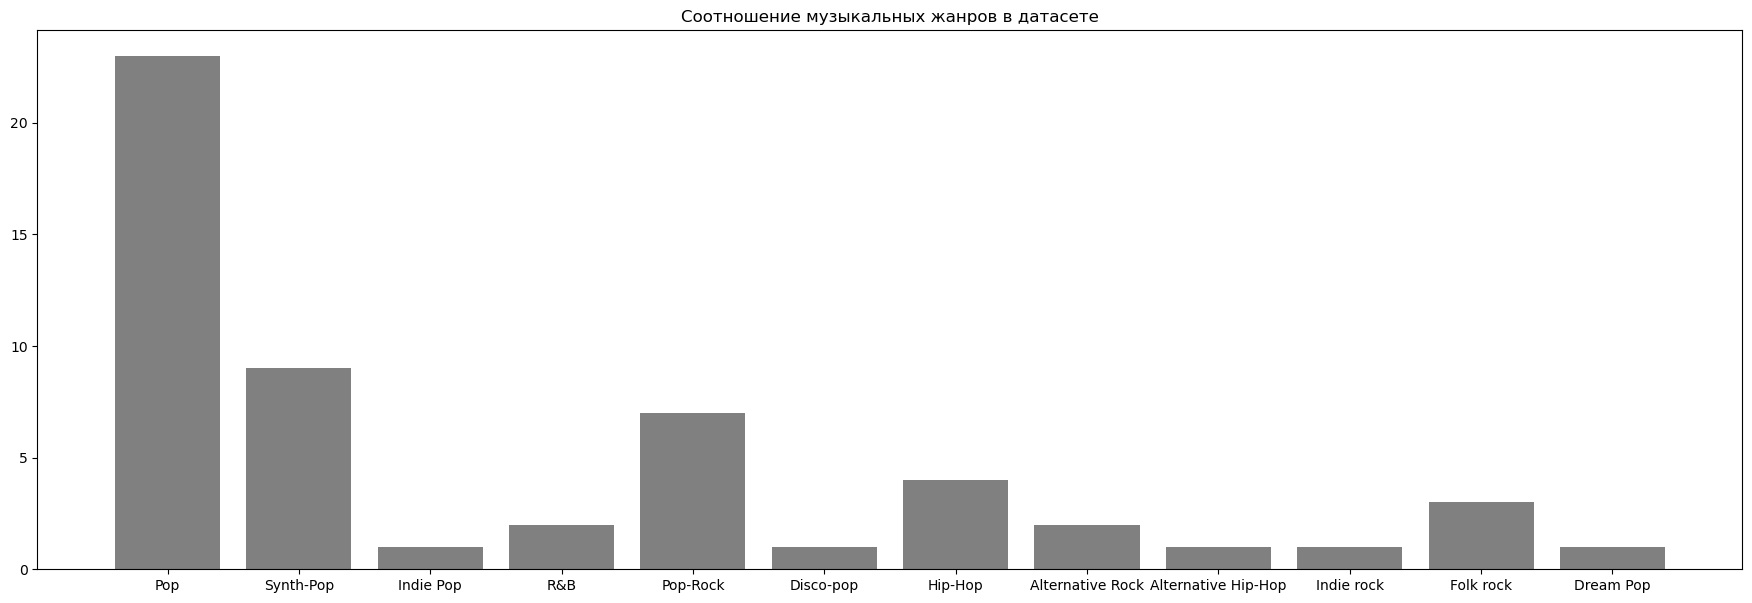

In [11]:
for i in range(5):
    df.iloc[:, i] = [str(i) for i in df.iloc[:, i]] 
df.iloc[:, 8] = [int(i) for i in df.iloc[:, 8]] 
plt.figure(figsize = (22, 7))
plt.bar (df.genre.unique(), df['genre'].value_counts(sort = False), color = 'grey')
plt.title ('Соотношение музыкальных жанров в датасете')
plt.xticks(df.genre.unique(), fontsize=10)
plt.show()
plt.close('all')

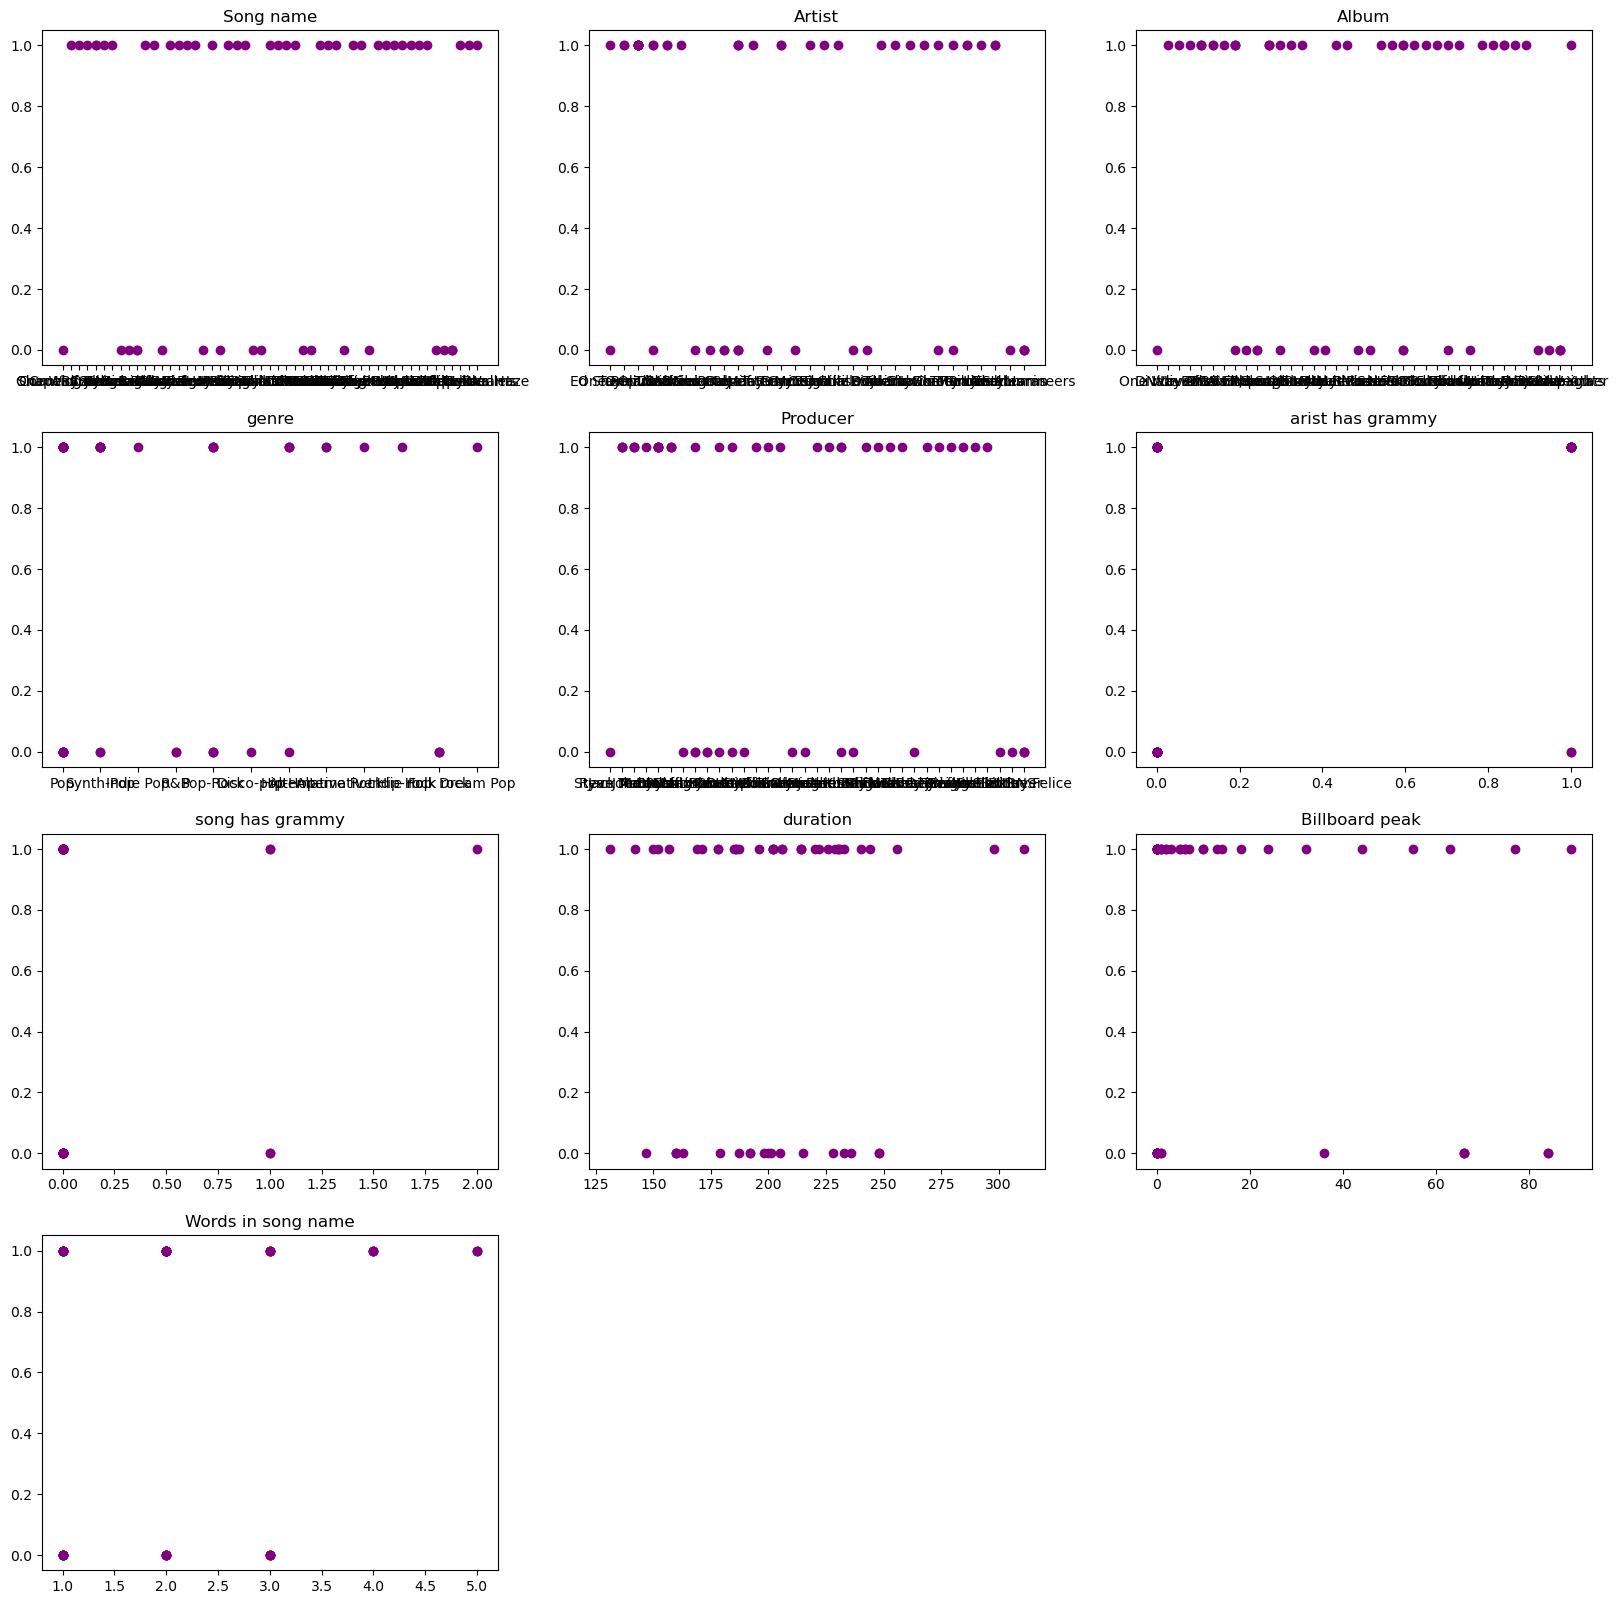

In [13]:
df1 = df.copy()
def Encode (df):
    for column in df.columns:
        if df[column].dtype != 'int64' and df[column].dtype != 'float64':
            enc = LabelEncoder()
            enc.fit(df[column])
            df[column] = enc.transform(df[column])
    return df
df1 = Encode(df1)
# распределение факторов относительно результирующей переменной
fig = plt.figure(figsize = (20, 20))
for i, item in enumerate(df1.columns[0:-1], start = 1):
    graf = fig.add_subplot(4, 3, i)
    plt.scatter(df[item], df['Like/not like'], color = 'purple')
    graf.set_title(item)
plt.show()
plt.close('all')

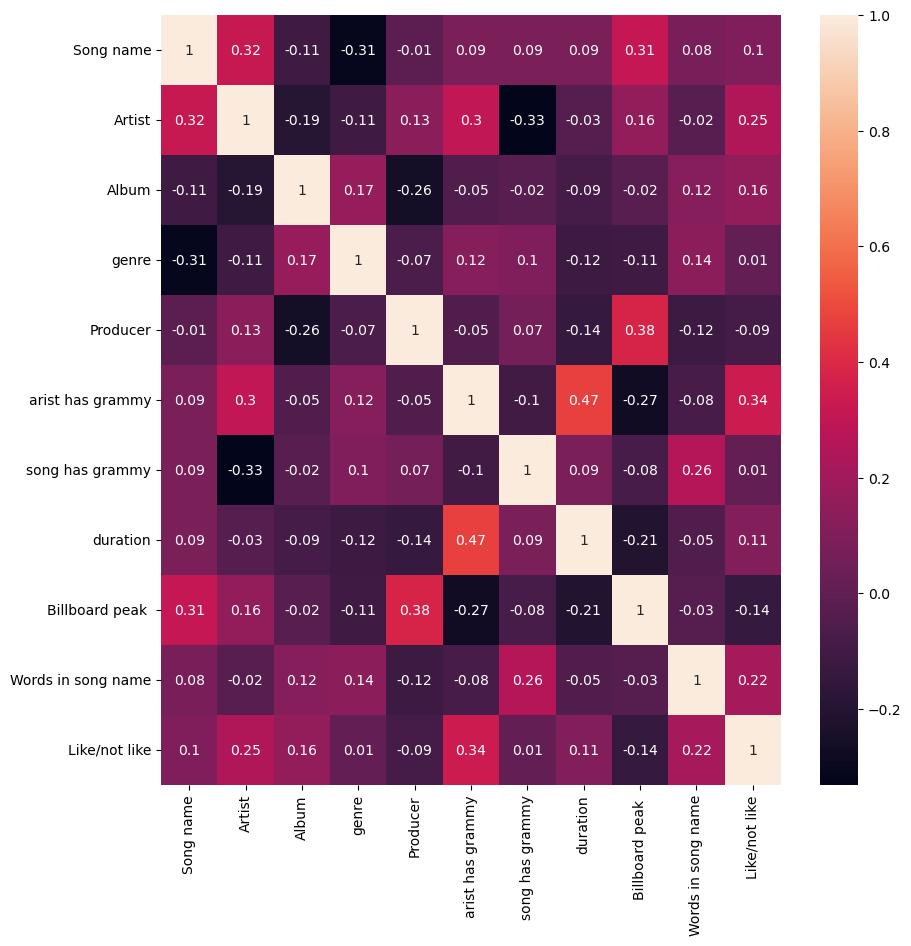

In [14]:
plt.figure(figsize = (10, 10))
sns.heatmap(df1.corr())
sns.heatmap(df1.corr().round(2), cbar = False, annot = True)
plt.show()
plt.close('all')
# сильных взаимосвязей не наблюдается
# умеренная корреляция между продолжительностью песни и наличием грэмми у артиста
# на результирующую переменную большее влияние имеет наличие у артиста грэмми